[*********************100%%**********************]  1 of 1 completed

Ticker: MMM
Linear Regression RMSE: 23.345400509664255
Polynomial Regression RMSE: 17.889541945237646
RBF Regression RMSE: 2.031079103918119


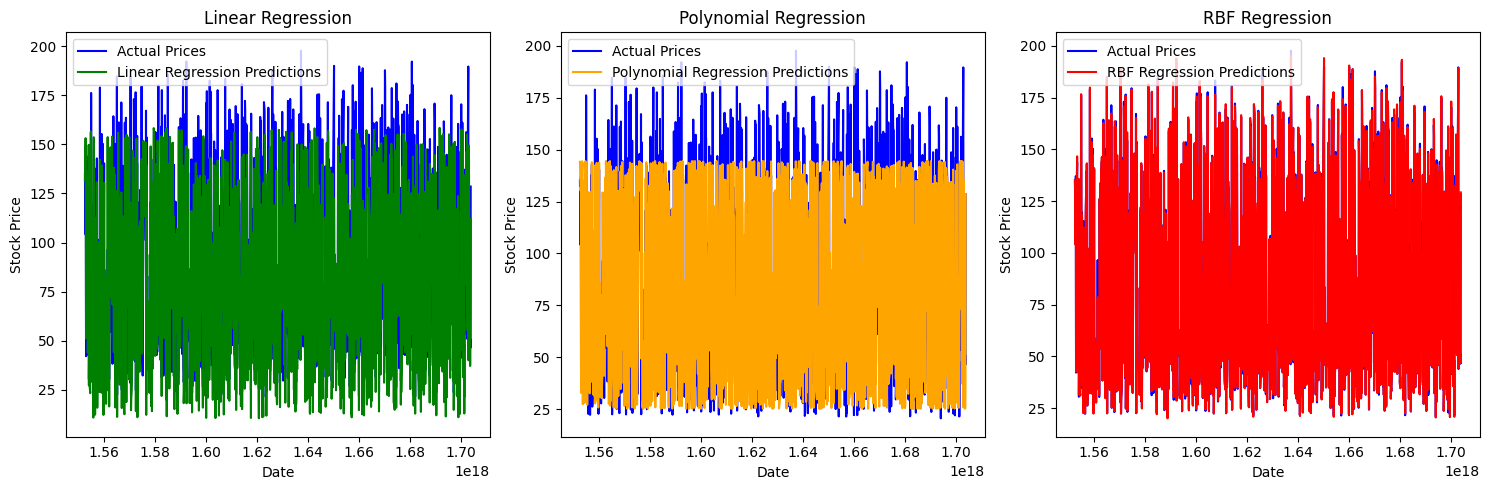

[*********************100%%**********************]  1 of 1 completed

Ticker: AOS
Linear Regression RMSE: 8.290036089475043
Polynomial Regression RMSE: 5.70710489120889
RBF Regression RMSE: 1.194796400405806


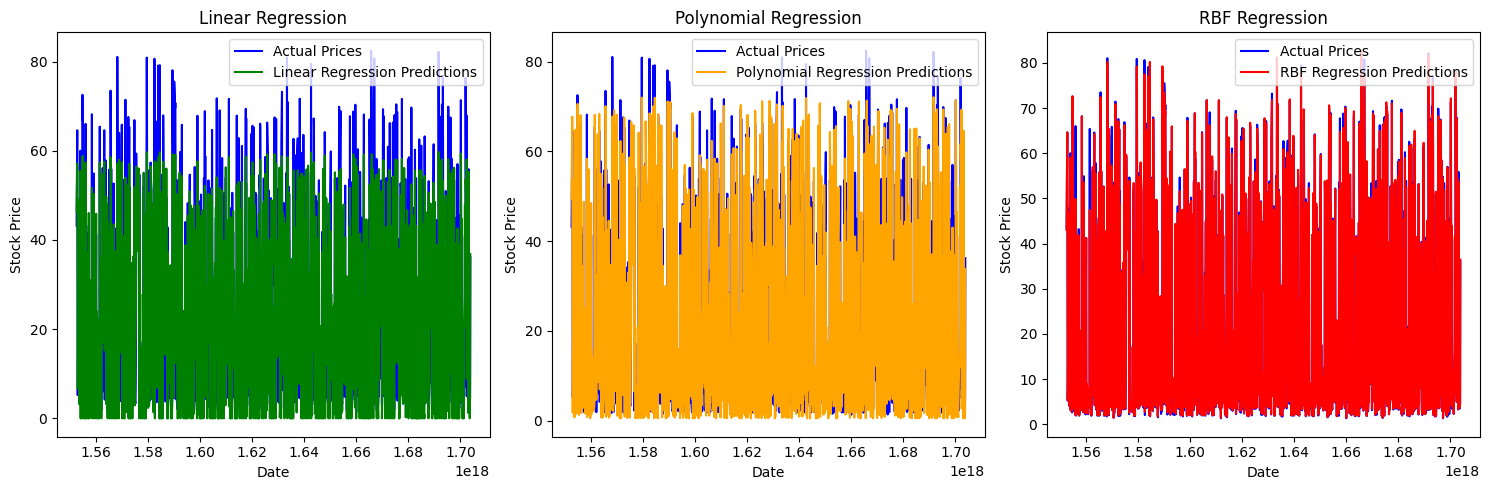

[*********************100%%**********************]  1 of 1 completed

Ticker: ABT
Linear Regression RMSE: 15.447210453165939
Polynomial Regression RMSE: 7.869617822362289
RBF Regression RMSE: 1.6615852999369114


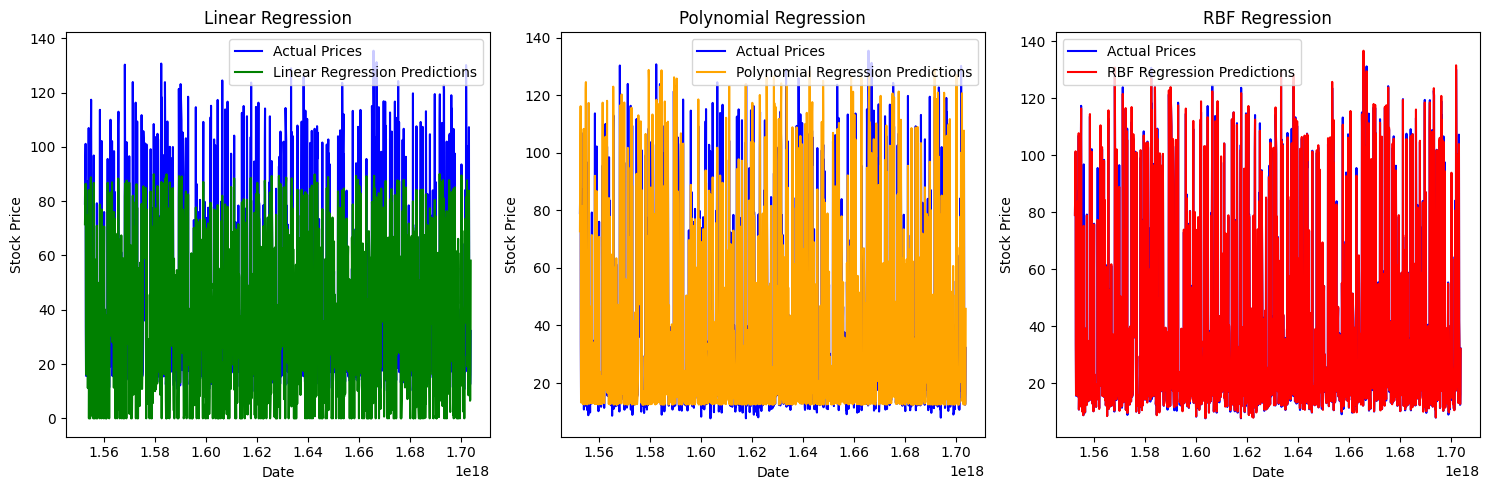

[*********************100%%**********************]  1 of 1 completed

Ticker: ABBV
Linear Regression RMSE: 13.873824681671937
Polynomial Regression RMSE: 9.867146596278985
RBF Regression RMSE: 1.5811718604907323


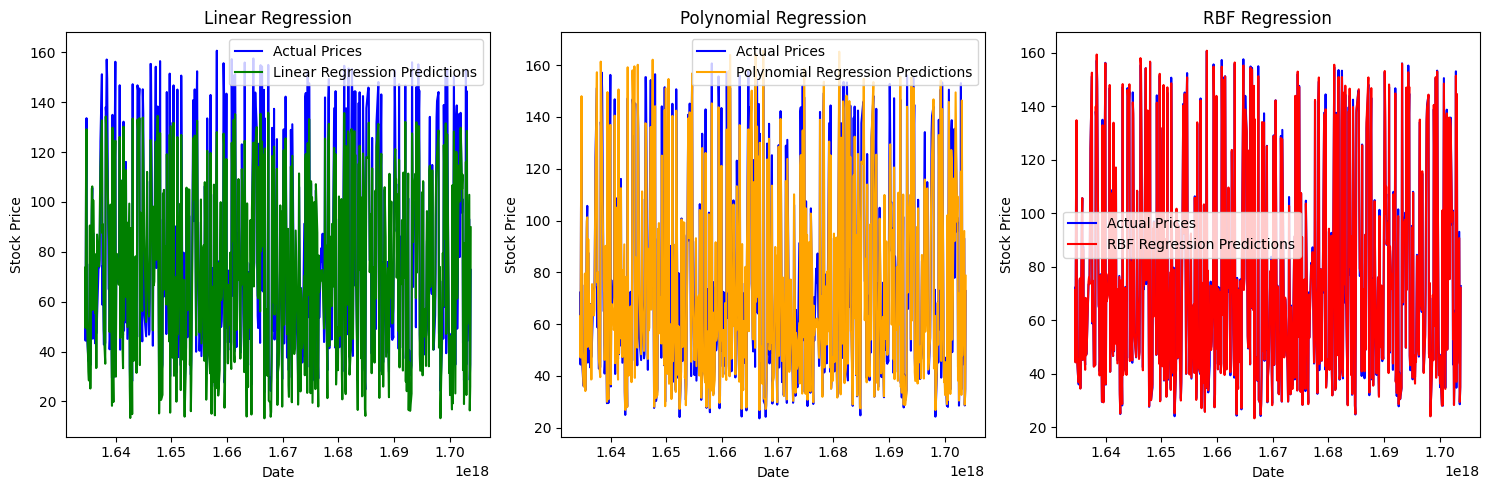

[*********************100%%**********************]  1 of 1 completed

Ticker: ACN
Linear Regression RMSE: 39.59230829755548
Polynomial Regression RMSE: 18.05527252501128
RBF Regression RMSE: 2.450401133070751


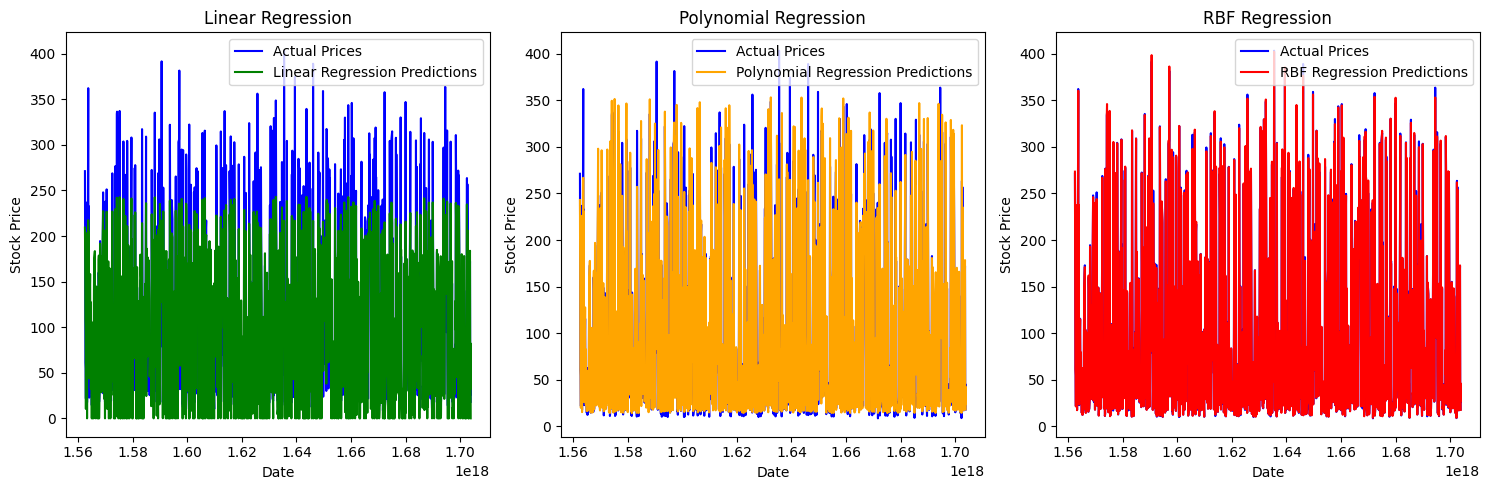

[*********************100%%**********************]  1 of 1 completed


In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import yfinance as yf
from datetime import datetime
from joblib import parallel_backend
import matplotlib.pyplot as plt

def get_sp500_tickers():
    url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
    tables = pd.read_html(url)
    sp500_table = tables[0]
    return sp500_table['Symbol'].tolist()


def fetch_stock_data(ticker, start_date, end_date):
    try:
        df = yf.download(ticker, start=start_date, end=end_date)
        return df
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return pd.DataFrame()

def calculate_returns(df):
    df.reset_index(inplace=True)  #reset index to make 'Date' a regular column
    df['Date'] = pd.to_numeric(df['Date'])
    df['Daily_Return'] = df['Adj Close'].pct_change()
    return df.dropna()

def stock_price_prediction(df):
    X = np.array(df.index).reshape(-1, 1)
    y = df['Adj Close']

    #split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_predictions = lr_model.predict(X_test)
    lr_predictions[lr_predictions < 0] = 0

    #polynomial Regression
    poly_features = PolynomialFeatures(degree=3)
    X_poly = poly_features.fit_transform(X_train)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y_train)
    poly_predictions = poly_model.predict(poly_features.transform(X_test))
    poly_predictions[poly_predictions < 0] = 0

    #radial Basis Function (RBF) Regression
    rbf_model = SVR(kernel='rbf', C=1000, gamma=0.1)
    rbf_model.fit(X_train, y_train)
    rbf_predictions = rbf_model.predict(X_test)
    rbf_predictions[rbf_predictions < 0] = 0

    return lr_predictions, poly_predictions, rbf_predictions, y_test

def main():
    #set the date range for fetching stock data
    start_date = datetime(2000, 1, 1)
    end_date = datetime(2023, 12, 31)

    #get S&P 500 tickers
    sp500_tickers = get_sp500_tickers()

    #fetch stock data for multiple companies
    for sample_ticker in sp500_tickers:  # Fetch data for the first 100 companies for demonstration purposes
        sample_df = fetch_stock_data(sample_ticker, start_date, end_date)

        if not sample_df.empty:
            #calculate returns
            returns_df = calculate_returns(sample_df)

            #perform stock price prediction
            lr_pred, poly_pred, rbf_pred, actual_prices = stock_price_prediction(returns_df)

            #evaluate the models
            lr_rmse = mean_squared_error(actual_prices, lr_pred, squared=False)
            poly_rmse = mean_squared_error(actual_prices, poly_pred, squared=False)
            rbf_rmse = mean_squared_error(actual_prices, rbf_pred, squared=False)

            print(f"\nTicker: {sample_ticker}")
            print(f"Linear Regression RMSE: {lr_rmse}")
            print(f"Polynomial Regression RMSE: {poly_rmse}")
            print(f"RBF Regression RMSE: {rbf_rmse}")

            #plot actual prices and predictions
            plt.figure(figsize=(15, 5))

            #linear Regression Plot
            plt.subplot(1, 3, 1)
            plt.plot(returns_df['Date'][-len(lr_pred):], actual_prices[-len(lr_pred):], label='Actual Prices', color='blue')
            plt.plot(returns_df['Date'][-len(lr_pred):], lr_pred, label=f'Linear Regression Predictions', color='green')
            plt.title('Linear Regression')
            plt.xlabel('Date')
            plt.ylabel('Stock Price')
            plt.legend()

            #polynomial Regression Plot
            plt.subplot(1, 3, 2)
            plt.plot(returns_df['Date'][-len(poly_pred):], actual_prices[-len(poly_pred):], label='Actual Prices', color='blue')
            plt.plot(returns_df['Date'][-len(poly_pred):], poly_pred, label=f'Polynomial Regression Predictions', color='orange')
            plt.title('Polynomial Regression')
            plt.xlabel('Date')
            plt.ylabel('Stock Price')
            plt.legend()

            #RBF Regression Plot
            plt.subplot(1, 3, 3)
            plt.plot(returns_df['Date'][-len(rbf_pred):], actual_prices[-len(rbf_pred):], label='Actual Prices', color='blue')
            plt.plot(returns_df['Date'][-len(rbf_pred):], rbf_pred, label=f'RBF Regression Predictions', color='red')
            plt.title('RBF Regression')
            plt.xlabel('Date')
            plt.ylabel('Stock Price')
            plt.legend()

            plt.tight_layout()
            plt.show()


if __name__ == "__main__":
    main()

